In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Data loading

In [2]:
df=pd.read_csv('/Users/xufeishao/Desktop/Bootcamp/006 Maching_learning/6.1 datasets/diabetes.csv')

## Exploratory Data Analysis

### Data overview

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
## Even though there is no missing data (null values), there are abnormal values in columns such as'SkinThickness'==0
## or 'Insulin'== 0. Therefore these values have to be processed before being fit to models.

In [8]:
len(df[df['SkinThickness']==0])  ## almost 30% of 'SkinThickness' is 0

227

In [9]:
len(df[df['Insulin']==0])   ## almost 50% of 'Insulin' is 0

374

In [10]:
len(df[df['BloodPressure']==0])

35

In [11]:
len(df[df['BMI']==0])

11

In [12]:
len(df[df['Glucose']==0])

5

In [13]:
## Considering a large percentage of the values are 0, simply dropping them might cause loss of important information

### Deal with the abnormal values

#### Visualizing distribution of the values in columns with abnormal values and then decide to use mean or median to replace '0'

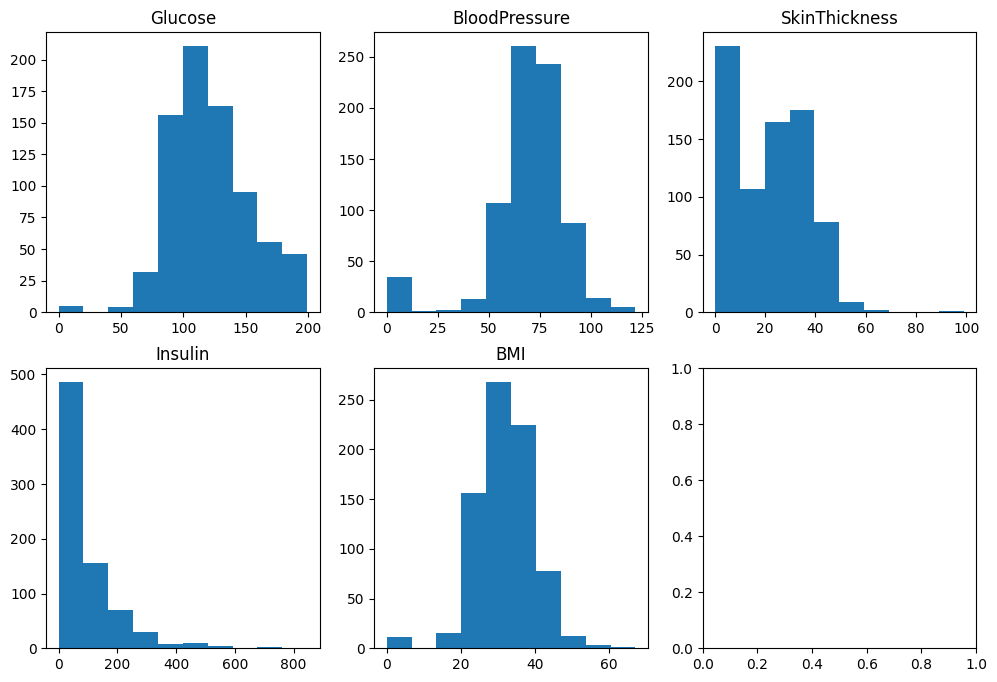

In [14]:
fig, axs = plt.subplots(2, 3,figsize=(12,8))
axs[0, 0].hist(df['Glucose'])
axs[0, 0].set_title('Glucose')
axs[0, 1].hist(df['BloodPressure'])
axs[0, 1].set_title('BloodPressure')
axs[0, 2].hist(df['SkinThickness'])
axs[0, 2].set_title('SkinThickness')
axs[1, 0].hist(df['Insulin'])
axs[1, 0].set_title('Insulin')
axs[1, 1].hist(df['BMI'])
axs[1, 1].set_title('BMI')
plt.show()

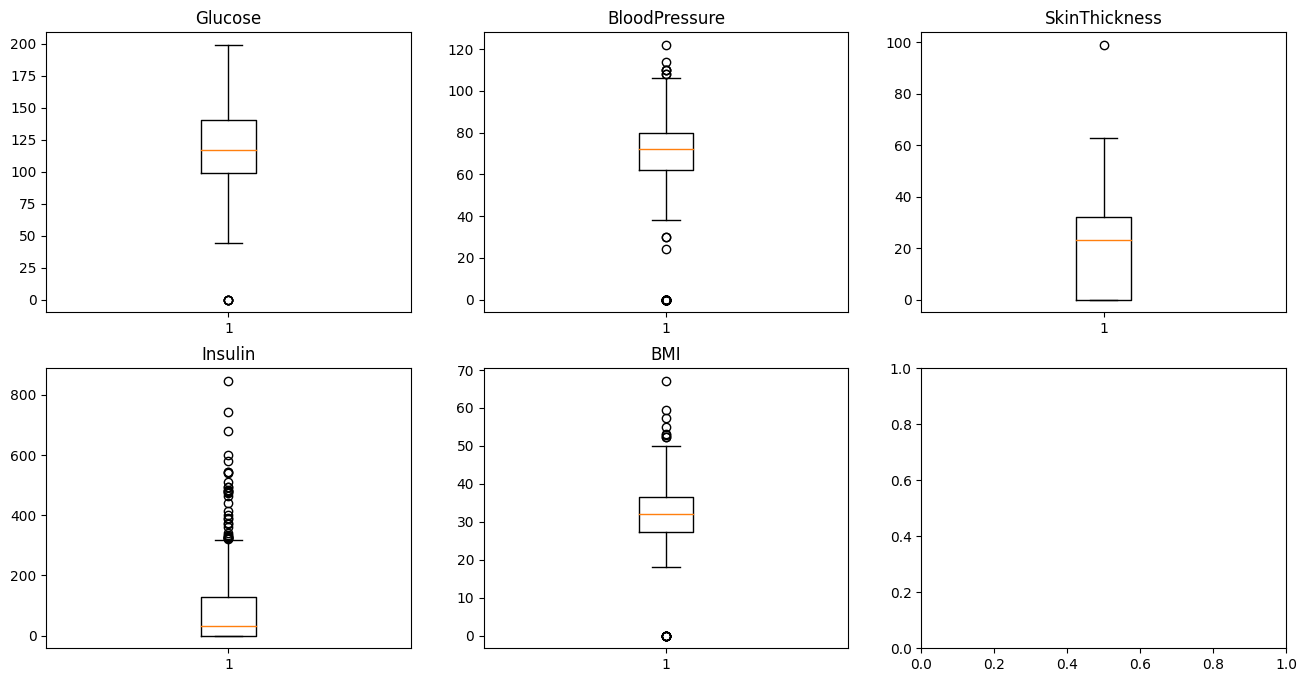

In [15]:
fig, axs = plt.subplots(2, 3,figsize=(16,8))
axs[0, 0].boxplot(df['Glucose'])
axs[0, 0].set_title('Glucose')
axs[0, 1].boxplot(df['BloodPressure'])
axs[0, 1].set_title('BloodPressure')
axs[0, 2].boxplot(df['SkinThickness'])
axs[0, 2].set_title('SkinThickness')
axs[1, 0].boxplot(df['Insulin'])
axs[1, 0].set_title('Insulin')
axs[1, 1].boxplot(df['BMI'])
axs[1, 1].set_title('BMI')
plt.show()

In [16]:
print(skew(df['Glucose']),kurtosis(df['Glucose'])) 

0.17341395519987735 0.6288133337300685


In [17]:
print(skew(df['BloodPressure']),kurtosis(df['BloodPressure'])) # approximate normal distribution

-1.8400052311728738 5.138690662525438


In [18]:
print(skew(df['SkinThickness']),kurtosis(df['SkinThickness']))

0.109158762323673 -0.5244944887652805


In [19]:
print(skew(df['Insulin']),kurtosis(df['Insulin']))

2.2678104585131753 7.159574916971424


In [20]:
print(skew(df['BMI']),kurtosis(df['BMI'])) # approximate normal distribution

-0.42814327880861786 3.2612574203612645


According to Scipy, kurtosis is the fourth central moment divided by the square of the variance. If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution. The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010).

#### From the plotting, skewness and kurtosis calculation, the distribution of BloodPressure and BMI are considered approximately normal, while Insulin, Skinthickness and Glucose are skewed. Therefore mean will be used to impute 0 values in,BloodPressure and BMI, and median will be used to impute 0 values in Insulin, Skinthickness and Glucose. 


In [21]:
df=df.replace({'Glucose': {0: df['Glucose'].median()}}) 

In [22]:
df=df.replace({'BloodPressure': {0: df['BloodPressure'].mean()},
               'SkinThickness': {0: df['SkinThickness'].median()},
               'BMI': {0: df['BMI'].mean()},'Insulin': {0: df['Insulin'].median()}}) 

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,30.5,33.6,0.627,50,1
1,1,85,66.0,29,30.5,26.6,0.351,31,0
2,8,183,64.0,23,30.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


<Figure size 600x600 with 0 Axes>

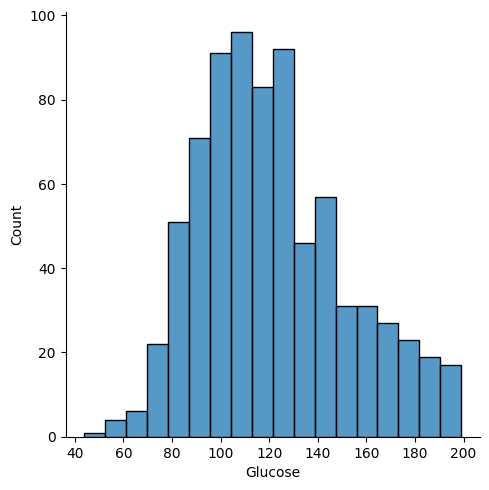

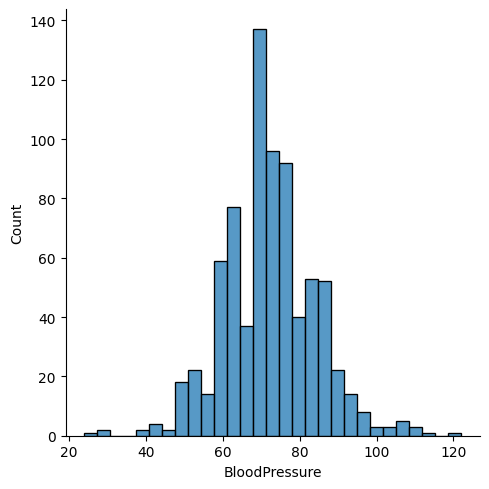

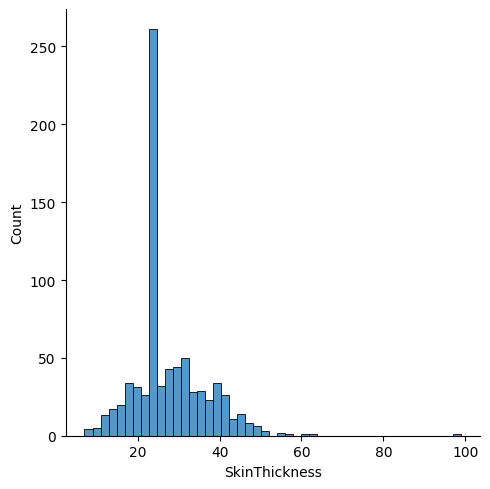

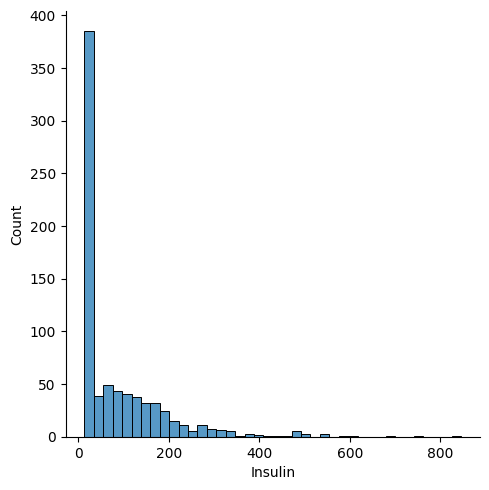

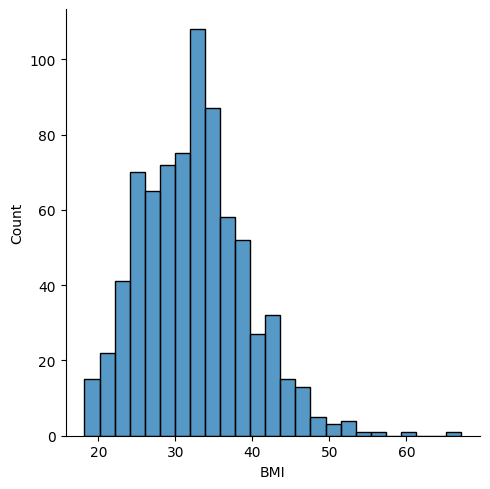

In [24]:
for i,col in enumerate(df.columns[1:6]):      # plot variable distribution after replacing '0' value with mean or median
  plt.figure(i,figsize=(6,6))
  sns.displot(df[col])

### See correlations between variables

In [25]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.219970,0.172143,0.357573,0.231408,0.137327,0.266909,0.492782
BloodPressure,0.208984,0.219970,1.000000,0.152458,-0.022049,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172143,0.152458,1.000000,0.238188,0.546958,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.022049,0.238188,1.000000,0.189031,0.178029,-0.015413,0.148457
BMI,0.021546,0.231408,0.281231,0.546958,0.189031,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137327,0.000371,0.142977,0.178029,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.326740,0.054514,-0.015413,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.162986,0.189065,0.148457,0.312254,0.173844,0.238356,1.000000


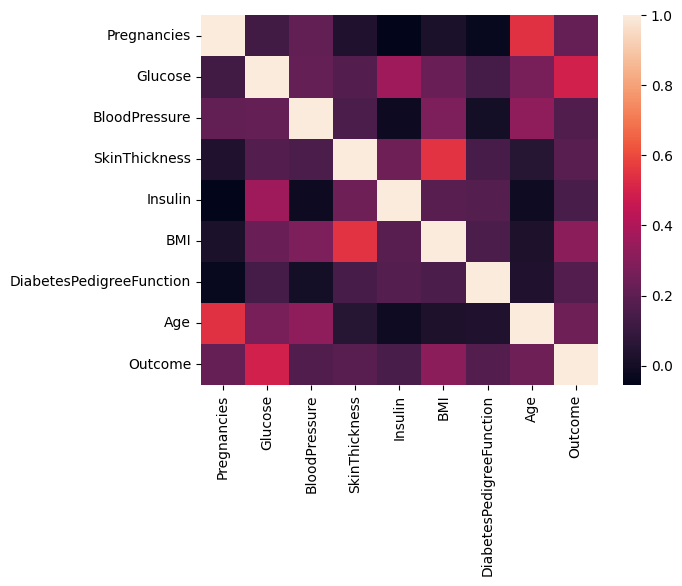

In [26]:
sns.heatmap(df.corr());

## Scale the data 
    1.since KNN will be choosen as one of the models to train and test data
    2.if only for Decisiontree and RandomforestClassifier, the scaling is not necessary

In [27]:
scaler = StandardScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [28]:
df_sc.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.021044,0.831114,-0.608201,0.167255,0.468492,1.425995
1,-0.844885,-1.205066,-0.516583,0.180566,-0.608201,-0.851535,-0.365061,-0.190672
2,1.233880,2.016662,-0.681762,-0.469981,-0.608201,-1.331821,0.604397,-0.105584
3,-0.844885,-1.073567,-0.516583,-0.469981,-0.006185,-0.633222,-0.920763,-1.041549
4,-1.141852,0.504422,-2.663916,0.831114,0.695378,1.549899,5.484909,-0.020496


## Split the data

In [29]:
X = df_sc

In [30]:
y = df['Outcome']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Apply algorithms -- DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6,random_state=123)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

In [33]:
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print('Accuracy: ',accuracy_score(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.64      0.49      0.55        47

    accuracy                           0.76       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.75      0.76      0.75       154

[[94 13]
 [24 23]]
Accuracy:  0.7597402597402597


### Evaluating DecisionTreeClassifier ROC Curve

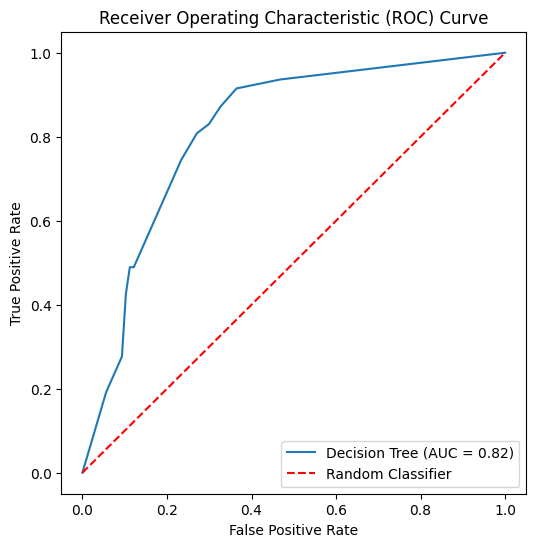

In [39]:
# Get the model's probability predictions for the positive case
dt_pred_proba = dt.predict_proba(X_test)[:,1]

# Compute the ROC curve
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,dt_pred_proba)

# Calculate AUC
roc_auc_dt = roc_auc_score(y_test, dt_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})') 

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Apply algorithms -- RandomForest

In [40]:
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print('Accuracy:', accuracy_score(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       107
           1       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154

[[95 12]
 [15 32]]
Accuracy: 0.8246753246753247


### Evaluating RandomForestClassifier ROC Curve

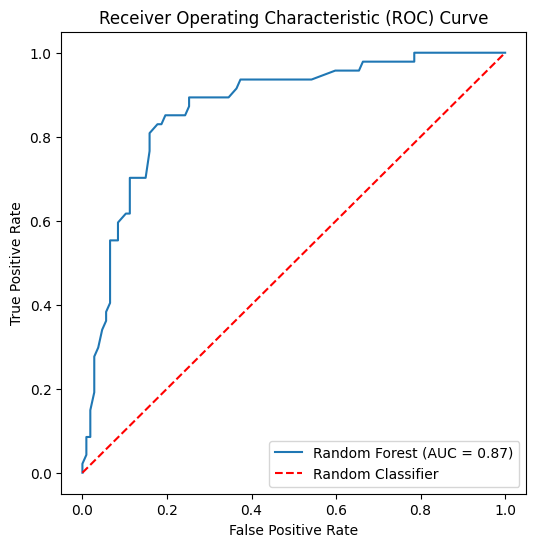

In [41]:
# Get the model's probability predictions for the positive case
rf_pred_proba = rf.predict_proba(X_test)[:,1]

# Compute the ROC curve
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,rf_pred_proba)

# Calculate AUC
roc_auc_rf = roc_auc_score(y_test, rf_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Random Forest (AUC = {roc_auc_rf:.2f})') 

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Apply algorithms -- KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print('Accuracy:', accuracy_score(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       107
           1       0.77      0.49      0.60        47

    accuracy                           0.80       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.79      0.80      0.78       154

[[100   7]
 [ 24  23]]
Accuracy: 0.7987012987012987


### Evaluating KNeighborsClassifier ROC Curve

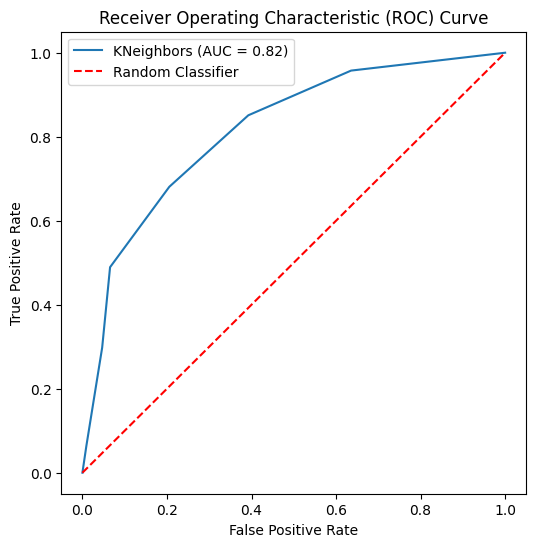

In [43]:
# Get the model's probability predictions for the positive case
knn_pred_proba = knn.predict_proba(X_test)[:,1]

# Compute the ROC curve
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,knn_pred_proba)

# Calculate AUC
roc_auc_knn = roc_auc_score(y_test, knn_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, label=f'KNeighbors (AUC = {roc_auc_knn:.2f})') 

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [44]:
model_score = {'model_name':['DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier'],
               'accuracy_score':[np.round(accuracy_score(y_test, dt_pred),2),np.round(accuracy_score(y_test,rf_pred),2),np.round(accuracy_score(y_test, knn_pred),2)],
               'roc_auc_score':[np.round(roc_auc_dt,2),np.round(roc_auc_rf,2),np.round(roc_auc_knn,2)]}
model_compare =pd.DataFrame(model_score)

In [45]:
print(model_compare)

               model_name  accuracy_score  roc_auc_score
0  DecisionTreeClassifier            0.76           0.82
1  RandomForestClassifier            0.82           0.87
2    KNeighborsClassifier            0.80           0.82


In [46]:
model_compare.head()

,model_name,accuracy_score,roc_auc_score
0,DecisionTreeClassifier,0.76,0.82
1,RandomForestClassifier,0.82,0.87
2,KNeighborsClassifier,0.80,0.82


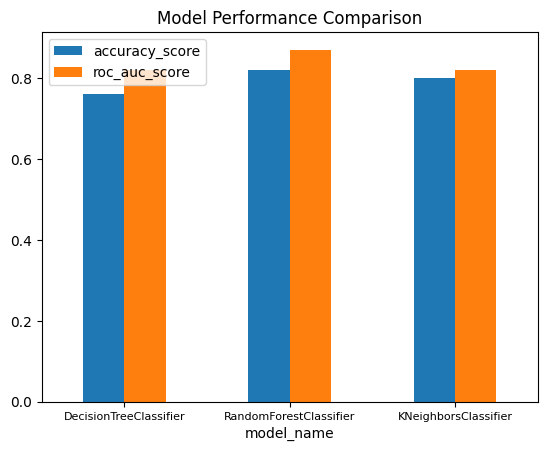

In [47]:
model_compare.plot(x='model_name', y=['accuracy_score','roc_auc_score'], kind='bar')
plt.xticks(rotation=0, fontsize=8)
plt.title('Model Performance Comparison')
plt.show()

### Conclusion: RandomforestClassifier model shows the best performance among the three models.